# Importing Libraries

In [76]:
#for data frame processing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for 3D projection
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

#for clustering
from sklearn.cluster import KMeans
from scipy.spatial import distance
from k_means_constrained import KMeansConstrained
from sklearn.neighbors import NearestNeighbors
!pip install k-means-constrained

#Loading Data

In [5]:
#uploading csv from local computer
from google.colab import files
upload=files.upload()

Saving co2_data.csv to co2_data (1).csv


In [6]:
#reading csv file using pandas
df=pd.read_csv('co2_data.csv') 


#Examining and Learning about the features of the dataframe

In [7]:
#getting general idea about data frame (df)
df.describe()

Footprint  Energy_kcal  ...  Selenium_mcg     Zinc_mg
count  284.000000   284.000000  ...    284.000000  284.000000
mean     3.153228   309.438664  ...     14.117218    1.402571
std      5.784729   133.478373  ...     16.177352    2.059856
min      0.109000     0.000000  ...      0.000000    0.000000
25%      0.656933   233.750000  ...      3.400000    0.357500
50%      1.410662   291.750000  ...     10.425000    0.654167
75%      3.192850   402.250000  ...     23.675000    1.222500
max     71.392768   900.000000  ...    194.000000   12.100000

[8 rows x 24 columns]

In [8]:
df.head()

Item  Footprint  ...  Selenium_mcg  Zinc_mg
0  agave cooked southwest   0.689880  ...           0.2     0.25
1   agave dried southwest   1.033267  ...           0.6    12.10
2     agave raw southwest   1.691278  ...           0.4     0.15
3              bear black   1.496333  ...           0.0     0.00
4       blackberries wild   0.491000  ...           0.0     0.15

[5 rows x 25 columns]

In [9]:
#to know data types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item           284 non-null    object 
 1   Footprint      284 non-null    float64
 2   Energy_kcal    284 non-null    float64
 3   Protein_g      284 non-null    float64
 4   Fat_g          284 non-null    float64
 5   Carb_g         284 non-null    float64
 6   Sugar_g        284 non-null    float64
 7   Fiber_g        284 non-null    float64
 8   VitA_mcg       284 non-null    float64
 9   VitB6_mg       284 non-null    float64
 10  VitB12_mcg     284 non-null    float64
 11  VitC_mg        284 non-null    float64
 12  VitE_mg        284 non-null    float64
 13  Folate_mcg     284 non-null    float64
 14  Niacin_mg      284 non-null    float64
 15  Riboflavin_mg  284 non-null    float64
 16  Thiamin_mg     284 non-null    float64
 17  Calcium_mg     284 non-null    float64
 18  Copper_mcg

In [10]:
#convert all data types to float
cols = ['Energy_kcal', 'VitA_mcg', 'Folate_mcg', 'Calcium_mg','Magnesium_mg', 'Phosphorus_mg']
for col in cols:
   df[col] = df[col].apply(lambda x: float (x) if x == x else "")

In [11]:
#checking data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item           284 non-null    object 
 1   Footprint      284 non-null    float64
 2   Energy_kcal    284 non-null    float64
 3   Protein_g      284 non-null    float64
 4   Fat_g          284 non-null    float64
 5   Carb_g         284 non-null    float64
 6   Sugar_g        284 non-null    float64
 7   Fiber_g        284 non-null    float64
 8   VitA_mcg       284 non-null    float64
 9   VitB6_mg       284 non-null    float64
 10  VitB12_mcg     284 non-null    float64
 11  VitC_mg        284 non-null    float64
 12  VitE_mg        284 non-null    float64
 13  Folate_mcg     284 non-null    float64
 14  Niacin_mg      284 non-null    float64
 15  Riboflavin_mg  284 non-null    float64
 16  Thiamin_mg     284 non-null    float64
 17  Calcium_mg     284 non-null    float64
 18  Copper_mcg

#Normalizing data

In [12]:
"""
* preparing data for normalization to keep values between 0 and 1
* using MinMaxScaler class available in the Scikit-learn library
* min-max approach rescales the feature to a fixed range of [0,1]
* Xnorm = X - Xmin / Xmax - Xmin
"""
#selecting numerical values in df only
df_num = df.select_dtypes(include=[np.number]) 
#to keep Footprint value out of normalization
df_num_1 = df_num.drop(['Footprint'], axis = 1)
#verifying changes
df_num_1.head()

Energy_kcal  Protein_g  Fat_g  ...  Phosphorus_mg  Selenium_mcg  Zinc_mg
0        135.0       0.99   0.29  ...            9.0           0.2     0.25
1        341.0       1.71   0.69  ...           37.0           0.6    12.10
2         68.0       0.52   0.15  ...            7.0           0.4     0.15
3        155.0      20.10   8.30  ...          162.0           0.0     0.00
4         52.0       0.84   1.07  ...           11.0           0.0     0.15

[5 rows x 23 columns]

In [13]:
"""
* Data normalization using MinMaxScaler
* To keep values between 0 and 1
* This is a better approach for clustering
"""
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_num_1 = pd.DataFrame(scaler.fit_transform(df_num_1), columns=df_num_1.columns)

#assign normalized values back to the original df
df[df_num_1.columns] = df_num_1

#verifying changes
df.head()

Item  Footprint  ...  Selenium_mcg   Zinc_mg
0  agave cooked southwest   0.689880  ...      0.001031  0.020661
1   agave dried southwest   1.033267  ...      0.003093  1.000000
2     agave raw southwest   1.691278  ...      0.002062  0.012397
3              bear black   1.496333  ...      0.000000  0.000000
4       blackberries wild   0.491000  ...      0.000000  0.012397

[5 rows x 25 columns]

#Data visualization

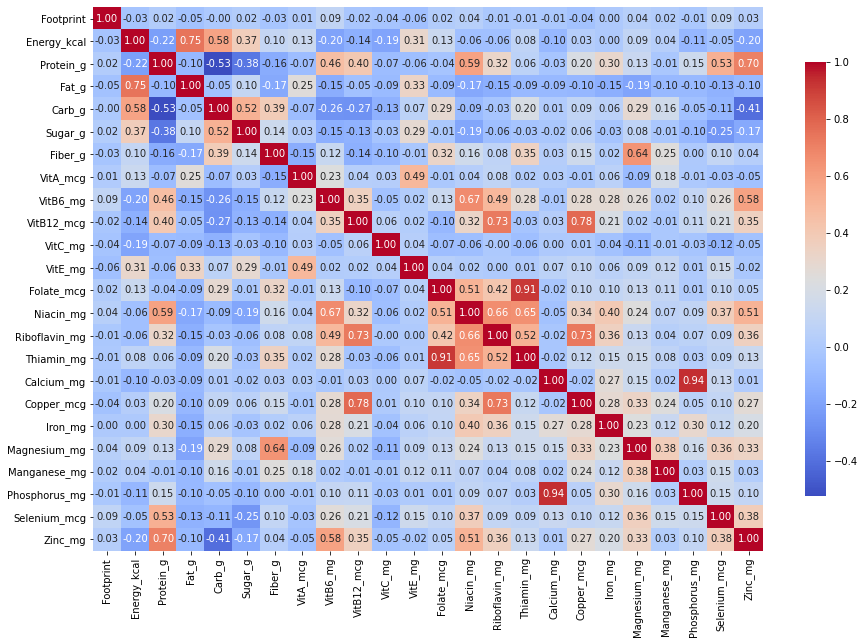

In [12]:
#displaying data frame in Axes
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, 
            fmt = ".2f", 
            cmap = 'coolwarm',
            cbar_kws = {"shrink": .8})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9973898d0>,
      dtype=object)

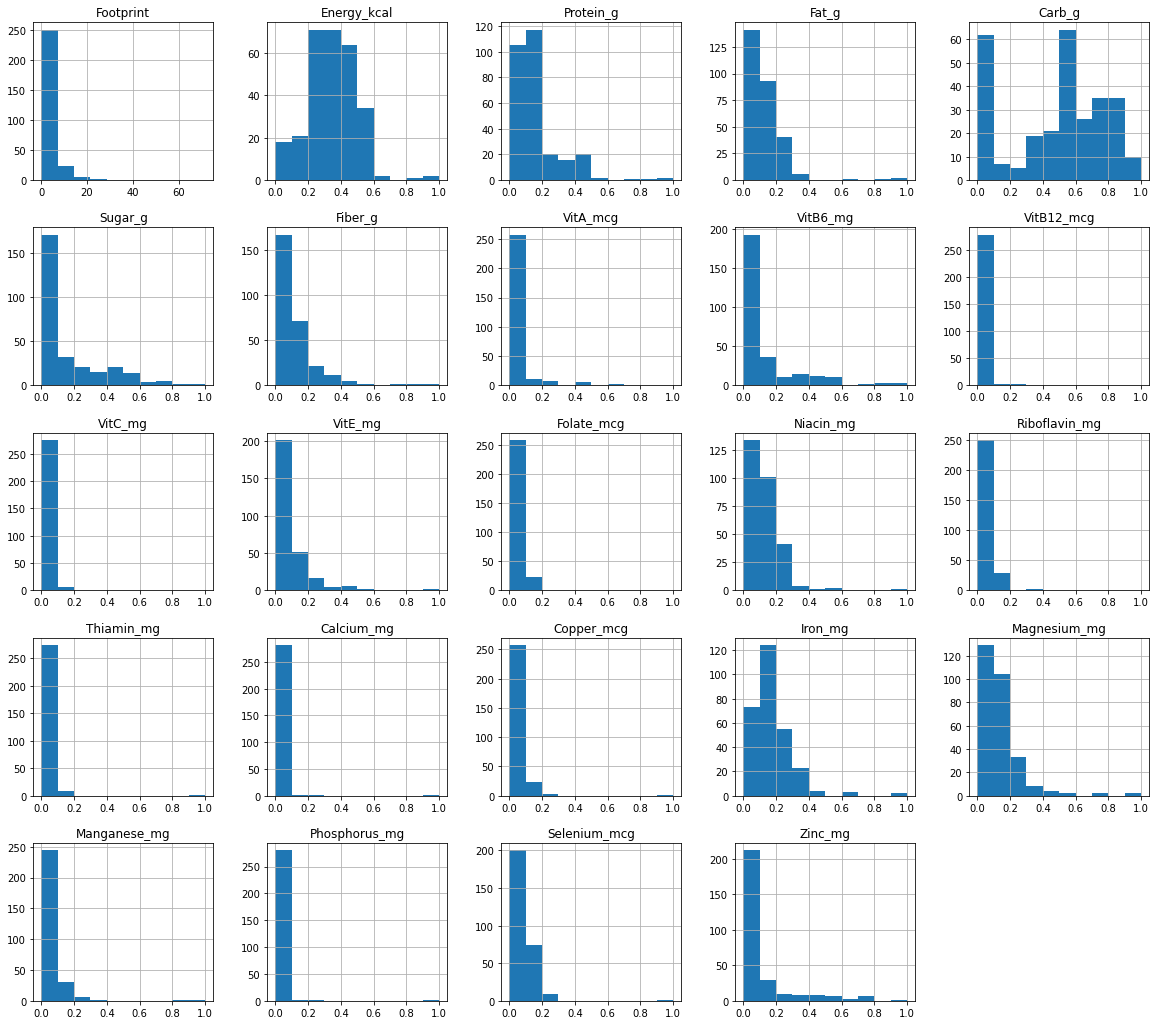

In [13]:
#displaying distribution of all nutritions in items
plt.rcParams["figure.figsize"] = (20, 18)
df.hist()

Text(0.5, 1.0, 'Carbon footprint distribution of food items')

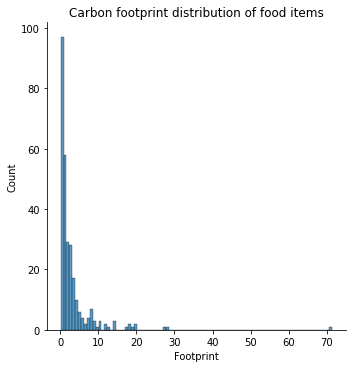

In [16]:
#closer look at footprint  distribution in items
sns.displot(df, x='Footprint')
plt.title("Carbon footprint distribution of food items")

In [15]:
#displaying nutrition to footprint relation for all items
data = df.drop(['Item', 'Footprint'], axis = 1)
for dato in data:
    fig = px.scatter(df, x = 'Footprint', y = dato,
                    size = dato, color = 'Item')
    fig.show()

#K-means Clustering
**1. Elbow method to find optimal K number of clsters**

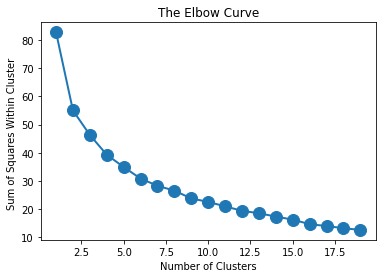

In [14]:
"""
KMeans clustering arguments

* WCSS: ( Within-Cluster Sum of Square distance between each point and the centroid in a cluster)
* n_clusters: is number of clusters decided by elbow method
* init: is the method for initializing the centroid
* k-means++: for smarter initialization of centroids
* max_iter: maximum number of iterations of the k-means algorithm for a single run
* n_init: Number of time the k-means algorithm will be run with different centroid seeds (defult is 10)
* random_state: determines random number generation for centroid initialization
"""

#droping features we do not want to cluster based on
# X1 has the clustering features (Energy_kcal, Protein_g, Fat_g, Carb_g, Sugar_g, Fiber_g, Calcium_mg, Iron_mg, Magnesium_mg, VitC_mg)

X1 = df.drop(['Item', 'Footprint', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg','VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Copper_mcg', 'Manganese_mg', 'Phosphorus_mg'], axis = 1)

#using the Elbow method to find the optimal K value (number of clsters).
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=10,n_init=10,random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

#plot the WCSS with K value
#the plot looks like an Elbow. 
#As the number of clusters increases, the WCSS value will start to decrease
#The point at which the elbow shape is created is 4, that is, our K value or an optimal number of clusters is 4.

plt.plot(range(1,20),wcss, linewidth = 2, markersize = 12, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within Cluster ')
plt.savefig('elbow.png')
plt.show()

#K-means Clustering
**2. KMeansConstrained with:**

## a. min max cluster size 
## b. k-means++ for smarter initialization of centroids

In [64]:
kmeans = KMeansConstrained(n_clusters=36, size_min=5, size_max=8, init='k-means++', n_init=10, max_iter=50, verbose=False, tol=1e-4, random_state=42)
kmeans.fit_predict(X1)

array([ 1, 33, 28, 22, 28, 28, 12, 23,  8,  1, 23, 17, 22, 22, 22, 25,  1,
        1, 22, 33, 27, 28, 23, 17, 17, 25, 25, 17, 17, 25, 17, 15, 22, 17,
       28, 22,  8,  8,  1, 22, 15, 15, 17, 15, 28, 15, 15, 15,  6,  6,  8,
        1, 14, 14, 14, 14, 14, 26,  0,  0, 32,  4, 19, 27, 13, 16, 32,  4,
       33,  7, 32, 30,  2,  6, 30, 30, 32, 35, 35, 19, 16, 32,  1, 27, 13,
       13, 13, 35,  1, 13, 35, 35, 35, 13,  6, 30, 13,  2,  2, 35, 16, 26,
        6, 18, 26, 18, 24, 18, 31,  9, 16,  6, 16,  0,  6,  5,  5, 26,  9,
       12, 24, 16, 27, 16, 16,  3,  3,  0,  3,  5, 31,  7, 24,  0,  0,  9,
        9, 26, 26, 31,  0, 11,  9, 31,  7, 18,  7, 24,  9,  7,  3, 31, 20,
       20,  2,  2, 31,  7,  4, 27, 20, 20, 20,  7,  2, 27, 14, 33, 12, 19,
       19,  2,  2, 19, 19, 27, 30, 24, 30, 24, 32, 32, 12, 11, 11, 35,  4,
       12, 12, 34,  3,  3,  3,  3, 19, 19, 26,  5, 20,  4, 15,  4, 13,  9,
       18,  6,  9, 33, 12, 31, 31,  0,  7, 34, 33, 34, 12,  4,  8, 11, 18,
       29, 34, 34, 29, 14

In [65]:
#Printing centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[4.95446759e-01 8.88191872e-02 1.84773958e-01 7.92649677e-01
  5.62828483e-01 2.49552846e-01 4.82456140e-04 9.41127931e-03
  2.28689558e-01 2.10708535e-01 3.50923539e-02 6.94197658e-02
  3.90000000e+01]
 [1.85115741e-01 1.03833361e-01 5.27395833e-02 2.83774043e-01
  9.19717104e-02 2.75914634e-01 2.53026316e-01 2.04978090e-02
  1.34349280e-01 7.72946860e-02 2.27018900e-02 3.11983471e-02
  1.35000000e+01]
 [4.48965278e-01 1.99294796e-01 8.44925000e-02 8.09379717e-01
  4.94119925e-02 2.31768293e-01 1.26644737e-03 1.38128130e-02
  2.39274691e-01 2.06280193e-01 1.64075387e-01 9.75361570e-02
  2.70000000e+01]
 [5.51944444e-01 8.18615275e-02 2.34353125e-01 7.81420527e-01
  5.23112669e-01 9.29878049e-02 3.28947368e-05 1.95268040e-03
  1.54899691e-01 5.61594203e-02 2.59020619e-02 1.83884298e-02
  3.00000000e+00]
 [2.98611111e-01 1.14734198e-01 4.49937500e-02 6.06957990e-01
  2.97060982e-02 1.03048780e-01 8.77192980e-05 1.41688482e-01
  2.50745885e-01 1.82165862e-01 9.75945017e-02 7.62913223e-0

#Visualizing Clusters

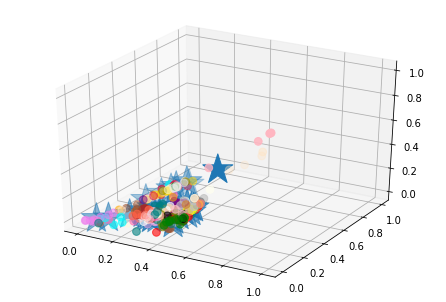

In [77]:
labels = kmeans.predict(X1)
C = kmeans.cluster_centers_
colors = ['red', 'cornsilk', 'green', 'yellow', 'orange', 'black', 'gray', 'pink', 'purple', 'teal', 'cyan', 'olive', 'brown', 'white', 'tomato', 'teal', 'firebrick', 'violet', 'sienna', 'peru', 'tan', 'beige', 'lavender', 'bisque', 'silver', 'gold', 'chocolate', 'lightpink', 'crimson', 'hotpink', 'plum', 'ivory', 'salmon', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
assign = []

for row in labels:
    assign.append(colors[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], X1.iloc[:, 2], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

In [67]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 3], X1.iloc[:, 4], X1.iloc[:, 5], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

In [68]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 6], X1.iloc[:, 7], X1.iloc[:, 8], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

In [69]:
#showing how many items per colour
copy = pd.DataFrame()
copy['Item'] = df['Item'].values
copy['Footprint'] = df['Footprint'].values
copy['label'] = labels
amount = pd.DataFrame()
amount['color'] = colors
amount['amount'] = copy.groupby('label').size()
amount

color  amount
0         red     8.0
1    cornsilk     8.0
2       green     8.0
3      yellow     8.0
4      orange     8.0
5       black     8.0
6        gray     8.0
7        pink     8.0
8      purple     6.0
9        teal     8.0
10       cyan     8.0
11      olive     8.0
12      brown     8.0
13      white     8.0
14     tomato     7.0
15       teal     8.0
16  firebrick     8.0
17     violet     8.0
18     sienna     8.0
19       peru     8.0
20        tan     8.0
21      beige     8.0
22   lavender     8.0
23     bisque     8.0
24     silver     8.0
25       gold     8.0
26  chocolate     8.0
27  lightpink     8.0
28    crimson     7.0
29    hotpink     8.0
30       plum     8.0
31      ivory     8.0
32     salmon     8.0
33          g     8.0
34          r     8.0
35          c     8.0
36          m     NaN
37          y     NaN
38          k     NaN
39          w     NaN

In [70]:
#compiling data frame with new values

#adding cluster_ID column to X1
X1['Cluster_ID'] = pd.DataFrame(kmeans.labels_)

#assign values back to the original df
df[X1.columns] = X1

#saving df to csv
df.to_csv('cluster_food.csv')

#to show number of items in each cluster
df['Cluster_ID'].value_counts()

35    8
9     8
16    8
15    8
13    8
12    8
11    8
10    8
7     8
18    8
6     8
5     8
4     8
3     8
2     8
1     8
34    8
17    8
19    8
20    8
33    8
32    8
31    8
30    8
29    8
27    8
0     8
26    8
25    8
24    8
23    8
22    8
21    8
28    7
14    7
8     6
Name: Cluster_ID, dtype: int64

#User's console view

In [74]:
food_choice = input("Enter a Food Item: ")

Enter a Food Item: waffles buttermilk


In [75]:
def recomandation(food_choice):
  food_choice = food_choice.lower()
  df_user_choice = df.loc[df['Item'] == food_choice]
  user_choice_carbon_footprint = float(df_user_choice['Footprint'])
  df_same_cluster = df.loc[df['Cluster_ID'] == int(df_user_choice['Cluster_ID'])]
  df_lower_CFP = df_same_cluster.loc[df_same_cluster['Footprint'] < user_choice_carbon_footprint]
  if len(df_lower_CFP) == 0:
    print('Great choice!')
  else:
    print(food_choice + ': has a carbon footprint of {} GHG'.format('%.2f'%user_choice_carbon_footprint))
    print('\n')
    print('Here is a list of items with lower carbon footprint:')
    print('\n')
    print(df_lower_CFP.sort_values(["Footprint"], ascending=True))


recomandation(food_choice)

waffles buttermilk: has a carbon footprint of 10.09 GHG


Here is a list of items with lower carbon footprint:


                                                  Item  ...  Cluster_ID
219                              pancakes plain frozen  ...          11
183                    english muffins raisin cinnamon  ...          11
184  english muffins raisin cinnamon includes apple...  ...          11
141                                cookies ladyfingers  ...          11
254                                       waffle plain  ...          11
253                                  waffle buttermilk  ...          11
256                             waffles chocolate chip  ...          11

[7 rows x 26 columns]
